In [1]:
import BioSimSpace as BSS

In [2]:
node = BSS.Gateway.Node("A node to parameterise a small molecule, run MD and do a conformational analysis.")
node.addAuthor(name="Antonia Mey", email="antonia.mey@ed.ac.uk", affiliation="University of Edinburgh")
node.setLicense("GPLv3")

In [3]:
node.addInput("file", BSS.Gateway.File(help="A molecular input file, e.g. a PDB file."))

node.addInput("forcefield", BSS.Gateway.String(help="The name of the force field to use for parameterisation.",
                                               allowed=BSS.Parameters.forceFields(), default="gaff"))

node.addInput("water", BSS.Gateway.String(help="The name of the water model to use for solvation.",
                                          allowed=BSS.Solvent.waterModels(), default="tip3p"))

node.addInput("box_size", BSS.Gateway.Length(help="The base length of the cubic simulation box.", unit="nanometer"))

node.addInput("ion_conc", BSS.Gateway.Float(help="The ionic concentration in mol/litre.",
                                            minimum=0, maximum=1, default=0))
node.addInput("minimisation_step", BSS.Gateway.Integer(help="The number of minimisation steps", default=1000))

In [4]:
node.showControls()

Box(children=(Box(children=(Box(children=(Label(value='file: A molecular input file, e.g. a PDB file.'), FileU…

Uploaded '2-cyclopentanylindole.mol2' (2.97 kB)


In [5]:
## Parmetrisation

In [5]:
system = BSS.IO.readMolecules(node.getInput("file"))
molecule = system.getMolecules()[0]
molecule = BSS.Parameters.parameterise(molecule, node.getInput("forcefield")).getMolecule()
system = BSS.Solvent.solvate(node.getInput("water"), molecule=molecule,
                                                     box=3 * [node.getInput("box_size")],
                                                     ion_conc=node.getInput("ion_conc"))

In [6]:
## Minimisation

In [7]:
protocol = BSS.Protocol.Minimisation(node.getInput("minimisation_step"))
process = BSS.MD.run(system, protocol, name="minimise")

In [13]:
min_syst = process.getSystem()

In [ ]:
## NVT Heating

In [14]:
protocol = BSS.Protocol.Equilibration(temperature_start=100*BSS.Units.Temperature.kelvin, temperature_end=300*BSS.Units.Temperature.kelvin)
process = BSS.MD.run(min_syst, protocol, name="equilibrate")

In [25]:
print(process.getTime(), process.getTemperature(), process.getTotalEnergy())

46.6000 ns 143.7550 K -9.5796e+04 kJ/mol


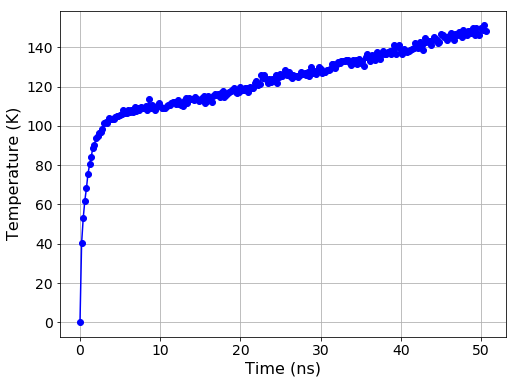

In [26]:
# Generate a plot of time vs temperature.
plot1 = BSS.Notebook.plot(process.getTime(time_series=True),
    process.getTemperature(time_series=True))


In [27]:
process.kill()

In [ ]:
nvt_syst = process.getSystem()

In [ ]:
## NPT equilibration